# Soil Water Deficits

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [25]:
# Load data
df = pd.read_csv("../datasets/wheat_ftsw.csv")
df.head()


,climate_class,city,state,year,BD-14,BD-18,BD-22,BD-26,BD-31,BD-35,BD-39,BD-43,BD-47,BD-51,BD-55,BD-60,BD-64,BD-68,BD-72,yield
0,semi-arid,Akron,CO,1986,0.642,0.707,0.468,0.279,0.285,0.134,0.249,0.225,0.082,0.039,0.031,0.024,0.033,0.068,0.042,2952
1,semi-arid,Byers,CO,1989,0.461,0.486,0.500,0.330,0.130,0.062,0.025,0.092,0.039,0.044,0.031,0.010,0.003,0.007,0.002,1715
2,semi-arid,Lamar,CO,1992,0.796,0.675,0.582,0.395,0.278,0.163,0.155,0.159,0.111,0.157,0.080,0.028,0.034,0.086,0.096,3437
3,semi-arid,Sedgwick,CO,1996,0.775,0.821,0.761,0.523,0.289,0.136,0.059,0.088,0.157,0.201,0.150,0.206,0.126,0.108,0.117,4091
4,semi-arid,Colby,KS,1999,0.714,0.611,0.660,0.397,0.214,0.177,0.099,0.054,0.031,0.012,0.008,0.004,0.003,0.002,0.001,1619


In [26]:
X = df.iloc[:,4:-1].values
X.shape


(75, 15)

In [27]:
k = 5 # Arbitrary, but reasonable
groups = KMeans(n_clusters=k, random_state=0).fit_predict(X)
print(groups)


[1 1 1 1 1 1 3 1 1 3 1 4 3 1 3 1 3 1 1 3 1 3 1 1 3 3 2 3 3 3 1 4 3 2 3 2 3
 3 4 3 2 3 1 2 3 0 1 3 3 3 0 3 2 1 3 3 0 2 0 4 2 4 2 2 2 3 3 3 4 0 3 0 2 0
 0]


In [28]:
# Get cumulative biological days for plotting purposes
cbd = [np.float(col[3:]) for col in df.columns[4:-1]]
print(cbd)


[14.0, 18.0, 22.0, 26.0, 31.0, 35.0, 39.0, 43.0, 47.0, 51.0, 55.0, 60.0, 64.0, 68.0, 72.0]


In [23]:
cbd = []
for col in df.columns[4:-1]:
        cbd.append(np.float(col[3:]))
        
print(cbd)

ValueError: could not convert string to float: 'r'

In [29]:
# Add groups to DataFrame
df.insert(1,"Kgroup",groups)


In [30]:
df

,climate_class,Kgroup,city,state,year,BD-14,BD-18,BD-22,BD-26,BD-31,...,BD-39,BD-43,BD-47,BD-51,BD-55,BD-60,BD-64,BD-68,BD-72,yield
0,semi-arid,1,Akron,CO,1986,0.642,0.707,0.468,0.279,0.285,...,0.249,0.225,0.082,0.039,0.031,0.024,0.033,0.068,0.042,2952
1,semi-arid,1,Byers,CO,1989,0.461,0.486,0.500,0.330,0.130,...,0.025,0.092,0.039,0.044,0.031,0.010,0.003,0.007,0.002,1715
2,semi-arid,1,Lamar,CO,1992,0.796,0.675,0.582,0.395,0.278,...,0.155,0.159,0.111,0.157,0.080,0.028,0.034,0.086,0.096,3437
3,semi-arid,1,Sedgwick,CO,1996,0.775,0.821,0.761,0.523,0.289,...,0.059,0.088,0.157,0.201,0.150,0.206,0.126,0.108,0.117,4091
4,semi-arid,1,Colby,KS,1999,0.714,0.611,0.660,0.397,0.214,...,0.099,0.054,0.031,0.012,0.008,0.004,0.003,0.002,0.001,1619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,moist-subhumid,3,Miami,OK,1986,0.994,0.956,0.991,0.865,0.735,...,0.376,0.335,0.244,0.199,0.154,0.278,0.489,0.485,0.398,5632
71,moist-subhumid,0,Miami,OK,2008,0.918,0.865,0.938,1.034,0.928,...,1.065,1.090,0.965,0.946,0.827,0.726,0.810,0.799,0.848,6373
72,moist-subhumid,2,Stillwater,OK,2000,0.887,0.968,0.879,0.890,0.833,...,0.382,0.656,0.545,0.341,0.454,0.379,0.382,0.336,0.445,4141
73,moist-subhumid,0,Paris,TX,1992,0.929,1.027,1.019,1.016,1.008,...,0.874,0.823,0.739,0.704,0.660,0.675,0.545,0.502,0.441,7544


In [31]:
# Examine matching of Kgroups with known climate classification according to Aridity Index
for i in range(df.shape[0]):
    print(df.loc[i,"city"],': ', df.loc[i,"climate_class"], df.loc[i,"Kgroup"])
    

Akron :  semi-arid 1
Byers :  semi-arid 1
Lamar :  semi-arid 1
Sedgwick :  semi-arid 1
Colby :  semi-arid 1
Dodge City :  semi-arid 1
Elkhart :  semi-arid 3
Garden City :  semi-arid 1
Goodland :  semi-arid 1
Liberal :  semi-arid 3
Ness City :  semi-arid 1
Oakley :  semi-arid 4
St. John :  semi-arid 3
Tribune :  semi-arid 1
Beaver :  semi-arid 3
Boise City :  semi-arid 1
Crosbyton :  semi-arid 3
Dalhart :  semi-arid 1
Dumas :  semi-arid 1
Haskell :  semi-arid 3
Hereford :  semi-arid 1
Muleshoe :  semi-arid 3
Perryton :  semi-arid 1
Plainview :  semi-arid 1
Quanah :  semi-arid 3
Ellsworth :  dry-subhumid 3
Ellsworth :  dry-subhumid 2
Great Bend :  dry-subhumid 3
Greensburg :  dry-subhumid 3
Kiowa :  dry-subhumid 3
Meade :  dry-subhumid 1
Medicine Lodge :  dry-subhumid 4
Norton :  dry-subhumid 3
Pratt :  dry-subhumid 2
Salina :  dry-subhumid 3
Scandia :  dry-subhumid 2
Smith Center :  dry-subhumid 3
Altus :  dry-subhumid 3
Alva :  dry-subhumid 4
Bessie :  dry-subhumid 3
Elk City :  dry-su

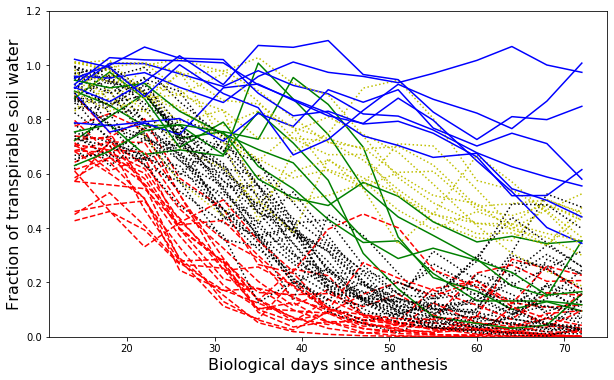

In [33]:
plt.figure(figsize=(10,6))

for i,g in enumerate(groups):
    if g == 0: 
        plt.plot(cbd, df.iloc[i,5:-1], '-b')
    elif g == 1: 
        plt.plot(cbd, df.iloc[i,5:-1], '--r')
    elif g == 2: 
        plt.plot(cbd, df.iloc[i,5:-1], ':y')
    elif g == 3: 
        plt.plot(cbd, df.iloc[i,5:-1], ':k')
    elif g == 4: 
        plt.plot(cbd, df.iloc[i,5:-1], '-g')
        
plt.xlabel('Biological days since anthesis', size=16)
plt.ylabel('Fraction of transpirable soil water', size=16)
plt.ylim(0,1.2)
plt.show()

## References

Sciarresi, C., Patrignani, A., Soltani, A., Sinclair, T. and Lollato, R.P., 2019. Plant traits to increase winter wheat yield in semiarid and subhumid environments. Agronomy Journal, 111(4), pp.1728-1740.